In [83]:
using LinearAlgebra
using Random

In [84]:
using Plots

In [85]:
#using Pkg
#Pkg.add("CSV")

In [86]:
#Pkg.add("DataFrames")
#Pkg.add("ImageView")

In [87]:
using Colors

In [88]:
using ImageView

In [89]:
using CSV

In [90]:
using DataFrames

In [91]:
function OMP(b, A, sparsity_level)
    # Orthogonal Matching Pursuit algorithm
    #Input : 
    # b vector to be compressed of size m*1
    # A : dictionary size m*N with m < N
    # sparsity level : number of non zeros coeeficients in the output vector
    # Output : 
    # sparse vector of size N*1
    res = copy(b)
    support = []
    x_s = 0
    for i = 1:sparsity_level
        support = OMP1(A, res , support)
        res, x_s = OMP2(A, b, support)
    end
    x = zeros(size(A)[2])
    x[support] = x_s
    return x
    
end

        
        
    

OMP (generic function with 1 method)

In [165]:
function OMP2(A, b, support)
    # Input
    # A, b : same as above
    # support : indices of non-zeros coefficient
    # Output : 
    # x_s : vectors which minimizes the reconstruction error using only basis vectors in support
    # res : residual ie difference between the vector to be compressed and the reconstructed vector
    # using only basis vectors in support
    A_s = A[:, support]
    x_s = inv(A_s'*A_s) * A_s'*b
    res = b - A_s*x_s
    return res, x_s
end

OMP2 (generic function with 1 method)

In [181]:
function OMP1(A, r, support)
    # Input A, support same as above
    # r : residual
    # add a new vector index to the support. It adds the vector which maximises the normalized dot
    # product between it and the residual. 
    # returns the new support
    max_val = -10^7
    n_max = 0
    for n in 1:size(A)[2]
        if !(n in support)
            an = A[:, n]
            val = an'*r/norm(an)^2
            if val > max_val
                max_val = val
                n_max = n
            end
        end
    end
    support = append!(support, n_max)
    return support
end      

OMP1 (generic function with 1 method)

In [167]:
function generate_sparse_vector(size, s)
    # generate randomly a sparse vector of size s with sparsity level s. I don't use it yet but can be useful
    v = zeros(size)
    idxs = shuffle(Vector(1:10))[1:s]
    v[idxs] = randn(s)
    return v
end
    
    

generate_sparse_vector (generic function with 1 method)

In [169]:
# test the OMP algorithm on one piece of synthetic data
m = 4 # original size
N = 10 # size of sparse vector
s = 3 # sparsity level
A = randn(m,N) # generate a random dictionnary
b = randn(m) # generate randomly the vector that we want to compress
println("original vector")
println(b)
x_hat = OMP(b, A, s) # compressed sparse vector (10 element including 3 non-zeros)
println("compressed sparse vector")
println(x_hat)
println("reconstructed vector")
print(A*x_hat)

original vector
[-0.6478098894815697, 0.41423070954904984, -1.0844301703421098, -0.39209642788181753]
compressed sparse vector
[0.6589802099369387, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3687925015321096, 0.0, 0.27868929915789353]
reconstructed vector
[-0.5346467216390184, 0.5747395553569613, -0.7005421199475208, -0.7210398185044239]

In [180]:
function compression_reconstruction(b, A, s)
    # compress the input vector b using OMP algorithm. Then reconstruct it with the dictionnary 
    # and compare with the original vector (with a l1 norm). 
    # OUT x_hat : sparse vector representing b
    # b_hat : reconstructed vector using sparse vector x_hat
    # error l1 norm between b_hat and b
    x_hat = OMP(b, A, s)
    b_hat = A*x_hat
    error = sum(abs.(b-b_hat))/size(b)[1]
    return x_hat, b_hat, error
end

compression_reconstruction (generic function with 1 method)

In [173]:
function test_OMP_synthetic_data(m, N, s, nb_tests)
    # returns the mean error between the original data generated randomly following gaussian distribution
    # and the reconstructed vector. ie l1_norm(b-b_hat)
    # also returns the average l1 distance between 2 randomly generated gaussian vector for comparaison
    mean_error = 0
    mean_error_random = 0
    for i in 1:nb_tests
        A = randn(m,N)
        b = randn(m)
        b1 = randn(m)
        x_hat, b_hat, error = compression_reconstruction(b, A, s)
        error_random = l1_norm(b-b1)/size(b)[1]
        mean_error += error
        mean_error_random += error_random
    end
    return mean_error/nb_tests, mean_error_random/nb_tests
end

     
    

test_OMP_synthetic_data (generic function with 1 method)

In [174]:
test_OMP_synthetic_data(m, N, s, 10)

(0.34976707064860285, 1.3907651362021736)

In [175]:
df = DataFrame(CSV.File("mnist_test.csv")) # load the mnist data base
df=convert(Matrix,df)

10000×785 Array{Int64,2}:
 7  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 2  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 4  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 4  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 9  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 5  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 9  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 6  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 9  0  0  0  0  0  0  0  0  0  0  0  0

In [177]:
dig = df[5, :] # 5 th digits of the data base
dig = dig[2:size(dig)[1]] # we don't care about the label (first element of the vector)

784-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

┌ Warning: Message queue is full. Ordering may be incorrect. Channel size can be increased by setting `ENV["REACTIVE_CHANNEL_SIZE"] = ...` before `using Reactive`.
└ @ Reactive C:\Users\thiba\.julia\packages\Reactive\g1LZ6\src\core.jl:274


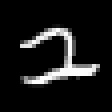

In [178]:
dig_reshaped = reshape(dig, (28, 28))
imshow(dig_reshaped)
Gray.(dig_reshaped/255)

In [74]:
m = 784 # size of digit (28*28)
N = 2000 # size of sparse vector
A_rd = randn(m,N) # we generate a random dictionnary

784×2000 Array{Float64,2}:
 -1.40636   -0.558037    0.517354   …   0.77156     -0.172167   0.275908
 -0.950536   0.584078   -0.754432      -0.672953     0.662488   0.0274519
  0.679675  -0.147133    0.210205      -0.0763733   -0.129721   0.975733
  1.70096   -2.05043     0.67195       -0.0267795   -0.437628  -1.45535
  0.514677   0.484657    1.46598       -1.05224      1.11958    0.237761
  0.636701  -0.305623    2.02647    …  -1.4541       0.176679   0.42082
  0.794433   0.0520044   0.590096      -0.706361    -0.863142   0.39417
  0.429305  -0.394139    0.319669      -0.88635     -1.11433    3.26839
  0.147213   0.307389    0.69232        0.970313    -0.515339  -0.10195
 -1.02661   -1.42984     0.072331       1.04177      0.471902   0.379115
  1.41711   -0.577356   -0.848623   …   0.33009     -0.242478   0.0825684
  1.305     -0.735109   -0.390806       0.147428    -1.10585   -0.19757
 -0.285211  -2.22535    -1.98538        1.25322     -0.176386   0.394322
  ⋮                         

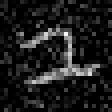

In [179]:
# visualize b_hat for one particular example
_, recons_digit, _ = compression_reconstruction(dig, A_rd, 150)
recons_reshaped = reshape(recons_digit, (28, 28))
Gray.(recons_reshaped/255)

In [146]:
function error_wrt_s(A, smin, smax, step)
    # Test the OMP algorithm with different sparsity levels and plot the errr with respect to s
    # IN A : dictionnary
    # smin, smax, step : test value of s between smin and smax separated by step
    s = smin
    ss = []
    errors = []
    
    while s < smax
        println("s=", s)
        _, recons_digit, error = compression_reconstruction(dig, A, s)
        println("error=", error)
        recons_reshaped = reshape(recons_digit, (28, 28))
        err = sum(abs.(recons_digit-dig))/784
        #imshow(recons_reshaped)
        append!(errors, err)
        append!(ss, s)
        #a = Gray.(recons_reshaped/255)
        s = s + step
    end
    plot(ss, errors)
end

error_wrt_s (generic function with 1 method)

s=10
error=37.47445515190963
s=20
error=39.311620097878304
s=30
error=39.472012712137854
s=40
error=39.67355896004293
s=50
error=39.33130754396248
s=60
error=38.71373385332846
s=70
error=38.11864642141603
s=80
error=37.457785698403335
s=90
error=36.84813590210062
s=100
error=36.27275916914816
s=110
error=35.725032085818924
s=120
error=34.92000403260697
s=130
error=34.0646898972573
s=140
error=33.59700470513106
s=150
error=32.94051194089749
s=160
error=32.13297107574289
s=170
error=31.566302373132118
s=180
error=30.384612604082
s=190
error=30.067150594525746
s=200
error=29.41572150932143


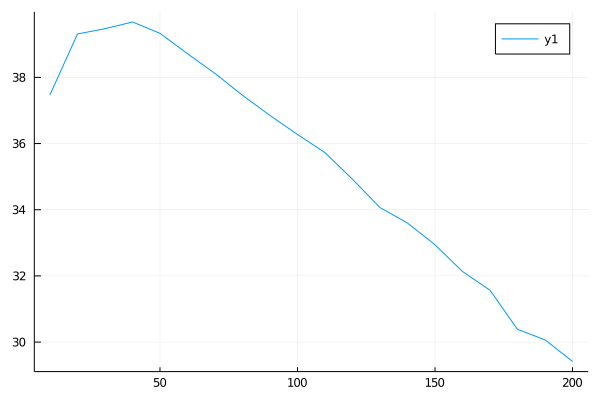

In [163]:
# test different value of s for OMP on random basis
error_wrt_s(A_rd, 10, 210, 10)

We can notice that the error first increases and reach a maximum for s=40, then it decreases more or lesslinearly. It seems not to be a particular case since I observed similar behaviour with other digits. 

The error l1 with s=200 is 30, with a gray color scale between 0 and 255

In [27]:
using ImageView

┌ Info: Precompiling ImageView [86fae568-95e7-573e-a6b2-d8a6b900c9ef]
└ @ Base loading.jl:1278


In [183]:
function cosine_basis(m, N, freq_min, freq_max)
    # generate a cosine dictionary : each column is a cosinus function. The frequency increases with the column index
    # freq_min = frequency of first column , freq_max frequency of last column
    A = zeros(m, N)
    f = 0
    f_step = (freq_max - freq_min)/N
    for t in 1:m
        for j in 1:N
            A[t, j] = cos(2*pi*f*t)
            f = f + f_step
        end
    end
    return A
end


cosine_basis (generic function with 1 method)

In [184]:
m = 784
N = 2000
A_cos = cosine_basis(m, N, 10, 200)

784×2000 Array{Float64,2}:
 1.0        0.827081    0.368125    …  -0.218143   0.368125     0.827081
 1.0        0.368125   -0.728969       -0.904827  -0.728969     0.368125
 1.0       -0.218143   -0.904827        0.612907  -0.904827    -0.218143
 1.0       -0.728969    0.0627905       0.637424   0.0627905   -0.728969
 1.0       -0.987688    0.951057       -0.891007   0.951057    -0.987688
 1.0       -0.904827    0.637424    …  -0.24869    0.637424    -0.904827
 1.0       -0.509041   -0.481754        0.999507  -0.481754    -0.509041
 1.0        0.0627905  -0.992115       -0.187381  -0.992115     0.0627905
 1.0        0.612907   -0.24869        -0.917755  -0.24869      0.612907
 1.0        0.951057    0.809017        0.587785   0.809017     0.951057
 1.0        0.960294    0.844328    …   0.661312   0.844328     0.960294
 1.0        0.637424   -0.187381       -0.876307  -0.187381     0.637424
 1.0        0.0941083  -0.982287       -0.278991  -0.982287     0.0941083
 ⋮                    

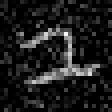

In [185]:
# visualize results on one piece of data with s=150
_, recons_cos, _ = compression_reconstruction(dig, A_cos, 150)
reshaped_cos = reshape(recons_digit, (28, 28))
Gray.(reshaped_cos/255)

s=10
error=37.47445515190966
s=20
error=39.31162009787826
s=30
error=39.47201271213788
s=40
error=39.67355896004291
s=50
error=39.331307543962495
s=60
error=38.713733853328506
s=70
error=38.11864642141602
s=80
error=37.457785698403356
s=90
error=36.8481359021006
s=100
error=36.27275916914821
s=110
error=35.72503208581891
s=120
error=34.92000403260697
s=130
error=34.06468989725727
s=140
error=33.59700470513106
s=150
error=32.940511940897515
s=160
error=32.13297107574285
s=170
error=31.56630237313214
s=180
error=30.384612604081997
s=190
error=30.067150594525746


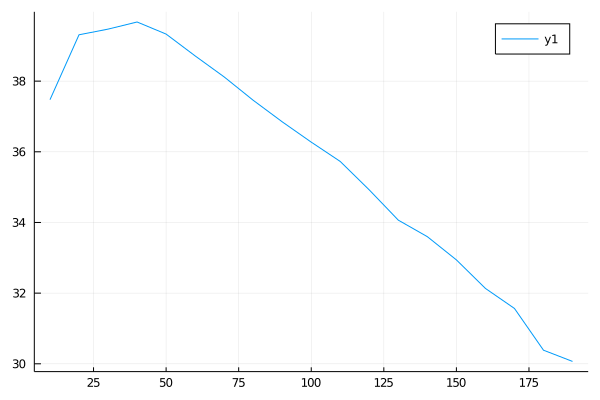

In [186]:
error_wrt_s(A_rd, 10, 200, 10)

Using a cosine basis do not seem to improve the results compared to random